# Abordagens Probabilistica 
- ### Exemplos : 
   - Filtros de Spam
   - Mineiração de emoções
   - Separações de documentos (ex, noticias segregadas por tipos)
### A ideia do naive assim como outros algoritmos é mostrar baseado em dados historicos quais todas as probabilidades de um evento acontecer e então mostrar o mais provavel, usando nossos atributos previsores

### A tabela de previsão gerada pelo naive nada mais é que uma contagem (frações) de quantas vezes um evento aconteceu sob um todo. como por exemplo: o risco de historico de credito alto apareceu 6 vezes em 14 linhas. Então a notação seria 6/14 e entao o algoritmo faz essas contagens COLUNA POR COLUNA até que entenda e identifique alguma correlação nos calculos com a classe meta.

### Correção laplaciana: 
   - Quando a tabela de probabilidades tras numeros 0, o algoritmo acha um valor padrao para que não altere tanto o resultado, e substitui os valores; 
    
#### Posteriori x apriori
 - o resultado pode ser descoberto usando dados apriori e gera o resultado posteriori

# Vantagens e Desvantagens

### Vantagens
- Rapido e intuitivo
- simplicidade de interpretação 
- Altas dimensoes (muitos atributos) 
- Boas previsoes em bases pequenas 

### Desvantagens:
- esse algoritmo entende que os atributos são independentes - cada par de caracteristicas sao independentes - nem sempre é verdade pois por ex: se tenho uma divida e uma renda, ele acha q uma coisa n tem uma coisa haver com a outra,nem sempre. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base Risco Credito



In [16]:
base_risco_credito = pd.read_csv(r"C:\Users\luis.bezerra.ext\Desktop\Projetos de Machine Learning\Machine Learning e Data Science com Python de A à Z\Bases de dados\risco_credito.csv")

In [17]:
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [20]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values
y_risco_credito = base_risco_credito.iloc [:, 4].values

In [21]:
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [23]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1]) 
x_risco_credito[:,2] = label_encoder_garantias.fit_transform(x_risco_credito[:,2]) 
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3]) 

In [25]:
# como essa planilha é pequena e nao tem tantos dados, tampouco dados numericos, nao vamos passar o ONEHOTENCODER para mantermos poucas classes e colunas
# temos somente os valores 0,1,2
# Na prática, você deve usar o OneHotEncoder para os dados previsores e o LabelEncoder para os dados de saída. No final das contas, todo algoritmo precisa que os dados estejam no formato one hot, mas muitas implementações transformam a variável de saída em one hot por conta desde que eles sejam valores numéricos.

In [24]:
import pickle

In [28]:
with open ('risco_credito.pkl','wb') as f:
    pickle.dump([x_risco_credito,y_risco_credito],f)

In [ ]:
from sklearn.naive_bayes import GaussianNB #Gaussian é o nome de uma distribuição estatistica que engola a maioria dos calculos

In [30]:
# Tabela de probabilidades
naive_risco_credito = GaussianNB() #importo a lib da tabela e dou esse objeto a variavel
naive_risco_credito.fit(x_risco_credito,y_risco_credito) #crio o modelo da função. Basicamente o fit aqui vai jogar
#os atributos previsoras e classes para a tabela.

#esse é o modelo ja criado.

GaussianNB()

### simulação de novo caso

In [33]:
#historico Boa(0),divida alta 0,garantia nenhuma 1,renda >35 2
#historico ruim 2 ,divida alta 0 ,garantia adequada 0,renda <15 0

previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

previsao

array(['baixo', 'moderado'], dtype='<U8')

In [34]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [38]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [39]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Base de credito

In [47]:
with open ('credit.pkl','rb') as f:
    x_credit_treinamento,y_credit_treinamento,x_credit_teste,y_credit_teste =pickle.load(f)

In [48]:
x_credit_treinamento.shape,y_credit_treinamento.shape

((1500, 3), (1500,))

In [49]:
x_credit_teste.shape,y_credit_teste.shape

((500, 3), (500,))

In [50]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento,y_credit_treinamento)

GaussianNB()

In [51]:
previsoes = naive_credit_data.predict(x_credit_teste) #agora vamos enviar os 500 registros que nao enviamos para o treinamento 

In [52]:
previsoes #1 nao paga # 0 paga - vamos comparar x com y agora, se bater,deu certo.

#usamos a base historica apenas, ou seja, quanto mais se aproximar da classe (y) que criamos melhor

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
y_credit_teste #resposta real, aquela coluna classe que tinhamos

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
accuracy_score(y_credit_teste,previsoes)*100

93.8

In [58]:
confusion_matrix(y_credit_teste,previsoes) 

array([[428,   8],
       [ 23,  41]], dtype=int64)

a linha 0 são os que pagam
a linha 1 os que nao pagam


- 428 clientes que foram classificados como que pagam e de fato pagam
- 8 clientes que pagam e foram considerados que nao pagam (erro)
- 23 que não pagam e foram classificados como que pagam (erro)
- 41 que nao pagam e de fato nao pagam



93.8

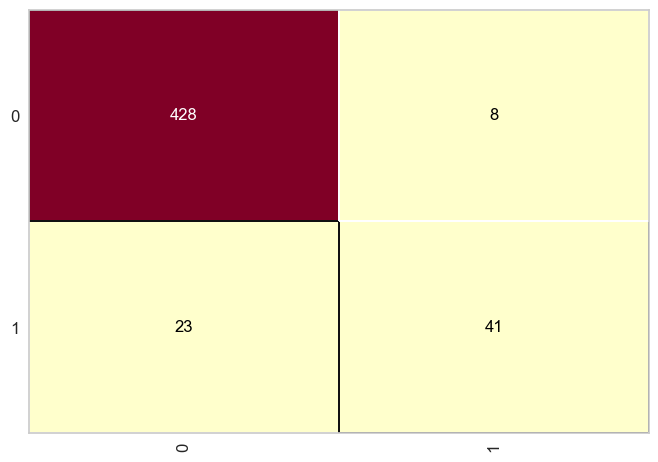

In [61]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento,y_credit_treinamento)
cm.score(x_credit_teste,y_credit_teste)*100

- 428 clientes que foram classificados como que pagam e de fato pagam
- 8 clientes que pagam e foram considerados que nao pagam (erro)
- 23 que não pagam e foram classificados como que pagam (erro)
- 41 que nao pagam e de fato nao pagam


#### Relação linha e coluna
 - A linha um são os itens 0 e as colunas mostram quantos ela considerou 0,1
 - a linha 2 são os itens 1 e as colunas mostram quantos ela considerou 0,1
 
  - 428 registros 0 que de fato foram considerados 0
  - 8 registros 0 que foram considerados 1
  - 23 registros que sao 1 mas foram considerados 0
  - 41 registros 1 que foram considerados 1

In [69]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



- notamos que ele tem uma precisao boa para achar os que pagam
- no campo recall ele fala que o algoritmo acerta 98% dos que pagam, mas dos que não pagam,64%

- o algoritmo acerta 98% (acha) dos que pagam e costuma estar certo em 95% dos casos (recall vs precision)
- ele traça 64% dos q nao pagam e acerta os maus pagadores em 84% dos casos

### entao pense, mostrou que o algoritmo acerta 93% dos casos ao todo. Mas note que a maiorias dos dados acertados sao de clientes que pagam. QUe ja da mais de 90%
    - entao sera que podemos confiar que ele acerta 93% sempre? 

# BASE CENSUS
   - que tipo de pessoas ganham mais de 50 mil?

In [70]:
with open ('census.pkl','rb') as f:
    x_census_treinamento,y_census_treinamento,x_census_teste,y_census_teste =pickle.load(f)

In [73]:
x_census_teste.shape

(4885, 108)

In [74]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento,y_census_treinamento)

GaussianNB()

In [76]:
previsoes = naive_census.predict(x_census_teste)

In [77]:
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

0.4767656090071648

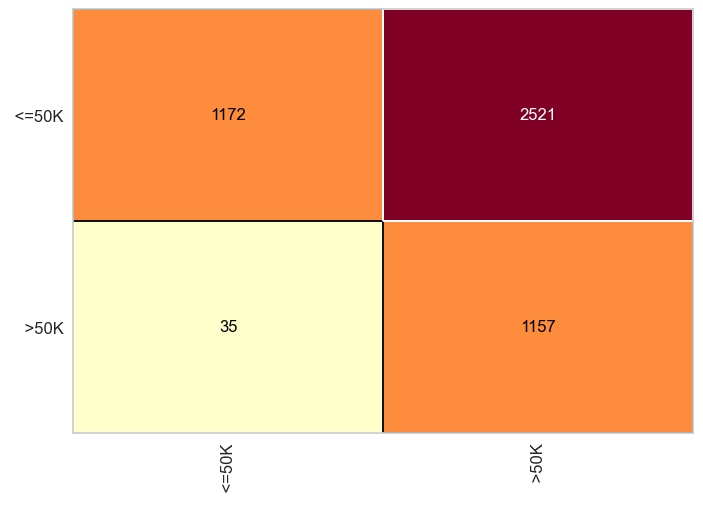

In [80]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento,y_census_treinamento)
cm.score(x_census_teste,y_census_teste)

In [81]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# base credito 2

In [9]:
credito2 = pd.read_csv(r"C:\Users\luis.bezerra.ext\Desktop\ArqFCD\31.Prática em Python\dados\Credit.csv",sep=',',low_memory=False)

In [22]:
credito2.head(4)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good


In [10]:
credito2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [11]:
credito2[credito2['age']<0].index

Int64Index([], dtype='int64')

In [12]:
credito2[credito2['age']>100].index

Int64Index([], dtype='int64')

In [13]:
import numpy as np
np.unique(credito2['class'],return_counts=True)

(array(['bad', 'good'], dtype=object), array([300, 700], dtype=int64))

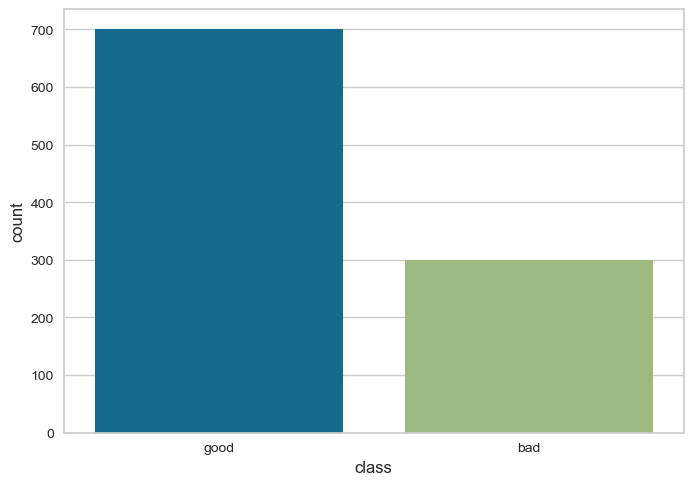

In [14]:
import seaborn as sns
sns.countplot(x = credito2['class']);

In [19]:
x_cred2 = credito2.iloc[:,0:20].values
y_cred2 = credito2.iloc[:,20].values

In [45]:
credito2.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
0,2,3,5,6,8,9,11,13,14,16,18,19

In [38]:
from sklearn.preprocessing import LabelEncoder
checking_status =LabelEncoder()
credit_history  =  LabelEncoder()      
purpose  =LabelEncoder()
savings_status = LabelEncoder()
employment =LabelEncoder()
personal_status =  LabelEncoder()
other_parties = LabelEncoder()
property_magnitude =  LabelEncoder()
other_payment_plans =LabelEncoder()
housing =   LabelEncoder()
job      = LabelEncoder()
own_telephone =     LabelEncoder()
foreign_worker  =    LabelEncoder()      


In [46]:
x_cred2[:,0] =  checking_status.fit_transform(x_cred2[:,0])
x_cred2[:,2] = credit_history.fit_transform(x_cred2[:,2])
x_cred2[:,3]=  purpose.fit_transform(x_cred2[:,3])
x_cred2[:,5]=  savings_status.fit_transform(x_cred2[:,5])
x_cred2[:,6]=  employment.fit_transform(x_cred2[:,6])
x_cred2[:,8]=  personal_status.fit_transform(x_cred2[:,8])
x_cred2[:,9]=  checking_status.fit_transform(x_cred2[:,9])
x_cred2[:,11]=  other_parties.fit_transform(x_cred2[:,11])
x_cred2[:,13]=  property_magnitude.fit_transform(x_cred2[:,13])
x_cred2[:,14]=  other_payment_plans.fit_transform(x_cred2[:,14])
x_cred2[:,16]=  housing.fit_transform(x_cred2[:,16])
x_cred2[:,18]=  own_telephone.fit_transform(x_cred2[:,18])
x_cred2[:,19]=  foreign_worker.fit_transform(x_cred2[:,19])

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehot = ColumnTransformer(transformers=[('Onehot',OneHotEncoder(),[0,2,3,5,6,8,9,11,13,14,16,18,19])],remainder='passthrough')


In [49]:
x_cred2 = onehot.fit_transform(x_cred2)


In [53]:
x_cred2.shape

(1000, 61)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [58]:
scaler_cred2 = StandardScaler()
x_cred2 = scaler_cred2.fit_transform(x_cred2)

In [59]:
x_cred2

array([[-0.80632811, -0.60662102,  1.62776996, ...,  2.76645648,
         1.02707891, -0.42828957],
       [-0.80632811,  1.6484757 , -0.61433742, ..., -1.19140394,
        -0.704926  , -0.42828957],
       [ 1.24018993, -0.60662102, -0.61433742, ...,  1.18331231,
        -0.704926  ,  2.33486893],
       ...,
       [ 1.24018993, -0.60662102, -0.61433742, ...,  0.21583532,
        -0.704926  , -0.42828957],
       [-0.80632811, -0.60662102,  1.62776996, ..., -1.10345149,
        -0.704926  , -0.42828957],
       [-0.80632811,  1.6484757 , -0.61433742, ..., -0.75164167,
        -0.704926  , -0.42828957]])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_credit2_treinamento,x_credit2_teste,y_credit2_treinamento,y_credit2_teste = train_test_split(x_cred2,y_cred2,test_size=0.25,random_state=0)

In [62]:
x_credit2_treinamento.shape

(750, 61)

In [73]:
import pickle 
with open ('credit2.pkl',mode='wb') as f:
    pickle.dump([x_credit2_treinamento,y_credit2_treinamento,x_credit2_teste,y_credit2_teste],f)

In [74]:
import pickle
with open ('credit2.pkl','rb') as f:
    x_credit2_treinamento,y_credit2_treinamento,x_credit2_teste,y_credit2_teste= pickle.load(f)

In [75]:
naive_cred2 = GaussianNB()
naive_cred2.fit(x_cred2,y_cred2)

GaussianNB()

In [76]:
previsoes = naive_cred2.predict(x_credit2_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
  

In [77]:
y_credit2_teste

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'goo

71.2

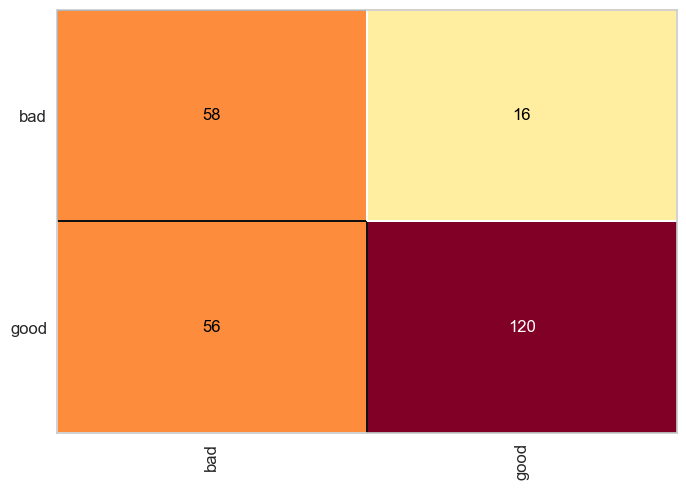

In [78]:
cm = ConfusionMatrix(naive_cred2)
cm.fit(x_credit2_treinamento,y_credit2_treinamento)
cm.score(x_credit2_teste,y_credit2_teste)*100